#**DATA PREPROCESSING**

In [59]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import copy

In [60]:
data = pd.read_csv("spg.csv")

In [61]:
data.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

In [62]:
data.shape

(4213, 21)

In [63]:
data.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [64]:
data.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


In [65]:
X = data.iloc[:, 0:20]
y = data.iloc[:, 20]
print('NaN/Null values in train are {}'.format(X.isnull().values.sum()))
print('NaN/Null values in test are {}'.format(y.isnull().values.sum()))


print('No of duplicates in train: {}'.format(sum(X.duplicated())))



NaN/Null values in train are 0
NaN/Null values in test are 0
No of duplicates in train: 0


In [66]:
X = data.drop('generated_power_kw', axis=1)
y = data['generated_power_kw']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3370, 20), (843, 20), (3370,), (843,))

#**EVALUATING THE MODEL USING ALGORIMTHMS**

#1.HILL CLIMBING ALGORITHM

In [ ]:

# Define the objective function to minimize (negative mean squared error)
def objective(params):
    params['objective'] = 'reg:squarederror'
    params['eval_metric'] = 'rmse'

    model = xgb.train(params, dtrain, num_boost_round=params['num_round'])
    y_pred = model.predict(dtest)
    mse = mean_squared_error(y_test, y_pred)

    return -mse  # Negative because we want to maximize the negative MSE (minimize MSE)

# Hill Climbing Optimization
def hill_climbing(initial_params, iterations):
    current_params = initial_params.copy()
    current_value = objective(current_params)

    for _ in range(iterations):
        neighbor_params = current_params.copy()

        # Perturb one hyperparameter
        param_to_perturb = np.random.choice(list(neighbor_params.keys()))

        # Check if the hyperparameter is numerical before perturbing
        if isinstance(neighbor_params[param_to_perturb], (int, float)):
            # Ensure 'max_depth' remains an integer
            if param_to_perturb == 'max_depth':
                neighbor_params[param_to_perturb] = int(neighbor_params[param_to_perturb] + np.random.uniform(-0.1, 0.1))
            elif param_to_perturb == 'num_round':
                perturbation_factor = max(1, int(neighbor_params[param_to_perturb] * 0.1))  # Adjust this factor as needed
                neighbor_params[param_to_perturb] = int(neighbor_params[param_to_perturb] + np.random.uniform(-perturbation_factor, perturbation_factor))
            elif param_to_perturb == 'learning_rate':
                neighbor_params[param_to_perturb] = max(0, neighbor_params[param_to_perturb] + np.random.uniform(-0.1, 0.1))
            else:
                neighbor_params[param_to_perturb] = float(neighbor_params[param_to_perturb]) + np.random.uniform(-0.1, 0.1)

        neighbor_value = objective(neighbor_params)

        # If the neighbor is better, update the current solution
        if neighbor_value > current_value:
            current_params = neighbor_params
            current_value = neighbor_value

    return current_params

# Example Usage
initial_params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'num_round': 100  # Initial value for num_round
}

optimized_params = hill_climbing(initial_params, iterations=50)

# Train the final model with the optimized parameters
final_model = xgb.train(optimized_params, dtrain, num_boost_round=optimized_params['num_round'])

# Make predictions on the test set
final_predictions = final_model.predict(dtest)

# Evaluate the final model
final_mse = mean_squared_error(y_test, final_predictions)




# Calculate and print R-squared




In [70]:
print("Optimized Parameters:", optimized_params)

Optimized Parameters: {'max_depth': 3, 'learning_rate': 0.13061770706482645, 'subsample': 0.7578063488918426, 'colsample_bytree': 0.8, 'num_round': 95, 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}


In [71]:
print("Final Mean Squared Error:", final_mse)
rmse = np.sqrt(final_mse)
print("Root Mean Squared Error (RMSE):", rmse)

Final Mean Squared Error: 176421.09114190008
Root Mean Squared Error (RMSE): 420.0251077517868


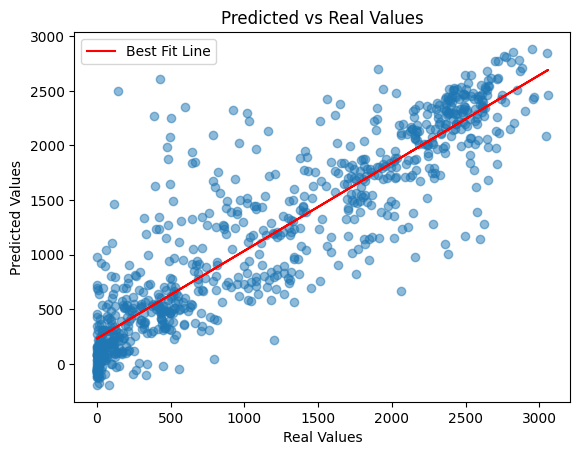

In [72]:
plt.scatter(y_test, final_predictions, alpha=0.5)

best_fit_line = np.polyfit(y_test, final_predictions, 1)
fit_line_fn = np.poly1d(best_fit_line)
plt.plot(y_test, fit_line_fn(y_test), color='red', label='Best Fit Line')

plt.title('Predicted vs Real Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#2.ANT COLONY OPTIMIZATION

In [ ]:

# Define the objective function to minimize (negative mean squared error)
def objective(params):
    params['objective'] = 'reg:squarederror'
    params['eval_metric'] = 'rmse'

    model = xgb.train(params, dtrain, num_boost_round=params['num_round'])
    y_pred = model.predict(dtest)
    mse = mean_squared_error(y_test, y_pred)

    return -mse  # Negative because we want to maximize the negative MSE (minimize MSE)

# Ant Colony Optimization
class ACO:
    def __init__(self, initial_params, iterations, ants):
        self.initial_params = initial_params
        self.iterations = iterations
        self.ants = ants
        self.best_params = initial_params.copy()
        self.best_value = objective(initial_params)

    def perturb(self, params):
        param_to_perturb = np.random.choice(list(params.keys()))

        if isinstance(params[param_to_perturb], (int, float)):
            if param_to_perturb == 'max_depth':
                params[param_to_perturb] = int(float(params[param_to_perturb]) + np.random.uniform(-0.1, 0.1))
            elif param_to_perturb == 'num_round':
                params[param_to_perturb] = int(params[param_to_perturb] + np.random.uniform(-10, 10))
            else:
                params[param_to_perturb] = float(params[param_to_perturb]) + np.random.uniform(-0.1, 0.1)

    def optimize(self):
        for iteration in range(self.iterations):
            for ant in range(self.ants):
                current_params = self.initial_params.copy()
                self.perturb(current_params)

                current_value = objective(current_params)

                if current_value > self.best_value:
                    self.best_value = current_value
                    self.best_params = current_params.copy()

        return self.best_params
initial_params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'num_round': 100  # Initial value for num_round
}
aco = ACO(initial_params, iterations=50, ants=10)
optimized_params_aco = aco.optimize()
final_model_aco = xgb.train(optimized_params_aco, dtrain, num_boost_round=optimized_params_aco['num_round'])
final_predictions_aco = final_model_aco.predict(dtest)
final_mse_aco = mean_squared_error(y_test, final_predictions_aco)



In [74]:
print("Optimized Parameters using ACO:", optimized_params_aco)

Optimized Parameters using ACO: {'max_depth': 3, 'learning_rate': 0.1800180832370522, 'subsample': 0.8, 'colsample_bytree': 0.8, 'num_round': 100, 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}


In [75]:
print("Final Mean Squared Error using ACO:", final_mse_aco)

Final Mean Squared Error using ACO: 175315.71084572893


In [76]:
rmse = np.sqrt(final_mse_aco)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 418.7071898662942


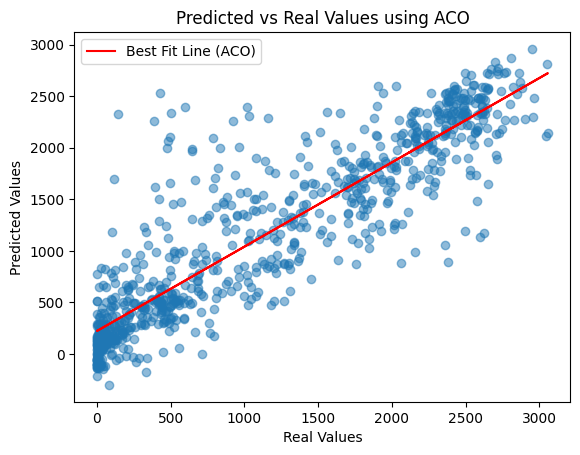

In [77]:


plt.scatter(y_test, final_predictions_aco, alpha=0.5)

best_fit_line_aco = np.polyfit(y_test, final_predictions_aco, 1)
fit_line_fn_aco = np.poly1d(best_fit_line_aco)
plt.plot(y_test, fit_line_fn_aco(y_test), color='red', label='Best Fit Line (ACO)')

plt.title('Predicted vs Real Values using ACO')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


#3.SIMULATED ANNEALING

In [78]:

# Define the objective function to minimize (negative mean squared error)
def objective(params):
    # Initialize and train the model with given parameters
    model = RandomForestRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf'])
    )

    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)

    return -mse  # Negative because we want to maximize the negative MSE (minimize MSE)

# Define the Simulated Annealing optimization function
def simulated_annealing(initial_params, cost_function, temperature, cooling_rate, num_iterations):
    current_params = initial_params
    current_cost = cost_function(current_params)

    best_params = copy.deepcopy(current_params)
    best_cost = current_cost

    for i in range(num_iterations):
        # Propose a new solution by perturbing the current solution
        new_params = {
            key: np.clip(np.random.normal(value, 1), 1, 100)  # Adjust the bounds based on your requirements
            for key, value in current_params.items()
        }

        # Calculate the cost of the new solution
        new_cost = cost_function(new_params)

        # Decide whether to accept the new solution
        if new_cost > current_cost or np.random.rand() < np.exp((new_cost - current_cost) / temperature):
            current_params = copy.deepcopy(new_params)
            current_cost = new_cost

        # Update the best solution if needed
        if new_cost > best_cost:
            best_params = copy.deepcopy(new_params)
            best_cost = new_cost

        # Cool down the temperature
        temperature *= cooling_rate

    return best_params

# Example Usage of Simulated Annealing
initial_params_rf = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 10,
    'min_samples_leaf': 5
}

# Set Simulated Annealing parameters
initial_temperature = 100.0
cooling_rate = 0.95
num_iterations = 50

# Run Simulated Annealing optimization
optimized_params_rf = simulated_annealing(initial_params_rf, objective, initial_temperature, cooling_rate, num_iterations)



# Train the final model with the optimized parameters
final_model_rf = RandomForestRegressor(
    n_estimators=int(optimized_params_rf['n_estimators']),
    max_depth=int(optimized_params_rf['max_depth']),
    min_samples_split=int(optimized_params_rf['min_samples_split']),
    min_samples_leaf=int(optimized_params_rf['min_samples_leaf'])
)

final_model_rf.fit(X_train, y_train)

# Make predictions on the test set
final_predictions_rf = final_model_rf.predict(X_test)

# Evaluate the final model
final_mse_rf = mean_squared_error(y_test, final_predictions_rf)



In [79]:
print("Optimized Parameters using Simulated Annealing:", optimized_params_rf)

Optimized Parameters using Simulated Annealing: {'n_estimators': 99.08778795852207, 'max_depth': 14.044720695927026, 'min_samples_split': 12.144639277432109, 'min_samples_leaf': 1.0923099048845295}


In [80]:
print("Final Mean Squared Error using Random Forest:", final_mse_rf)
rmse = np.sqrt(final_mse_rf)
print("Root Mean Squared Error (RMSE):", rmse)

Final Mean Squared Error using Random Forest: 167404.8320922935
Root Mean Squared Error (RMSE): 409.15135597024914


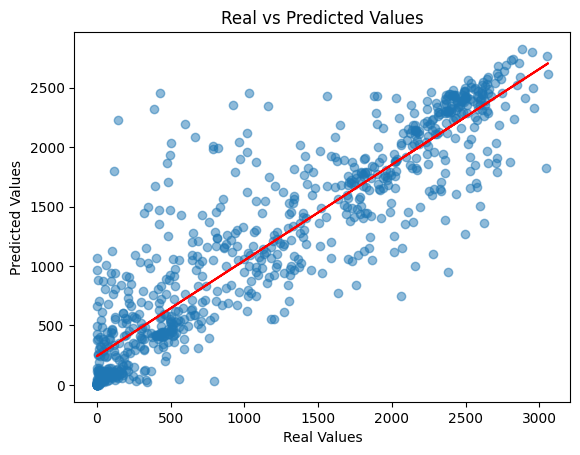

In [81]:
real_values = y_test  # Replace with your real values
predicted_values = final_predictions_rf  # Replace with your predicted values

fit_line = np.polyfit(real_values, predicted_values, 1)
fit_line_fn = np.poly1d(fit_line)

# Plot the best-fit line
plt.plot(real_values, fit_line_fn(real_values), color='red')

# Scatter plot between real and predicted values
plt.scatter(real_values, predicted_values, alpha=0.5)
plt.title('Real vs Predicted Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()